Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [6]:
import pandas as pd
df = pd.read_csv('./dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [11]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [12]:
#Step 2 : Check Missing Values in Dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Step 3 : Dataset Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling
Now Seperating X and Y variables

In [15]:
X = df.drop(labels=['target'],axis=1)
Y = df[['target']]

In [17]:
Y.value_counts()

target
1         165
0         138
dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)


In [19]:
xtrain.shape

(212, 13)

In [20]:
xtest.shape

(91, 13)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.


In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(xtrain,ytrain.values.flatten())


RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


In [22]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    acc = accuracy_score(y,ypred)
    pre = precision_score(y,ypred)
    rec = recall_score(y,ypred)
    f1 = f1_score(y,ypred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [23]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(xtest, ytest, rfc)

Accuracy Score  : 0.8462
Precision Score : 0.8600
Recall Score    : 0.8600
F1 Score        : 0.8600


In [25]:
from sklearn.metrics import classification_report
ypred_test = rfc.predict(xtest)
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



<AxesSubplot:>

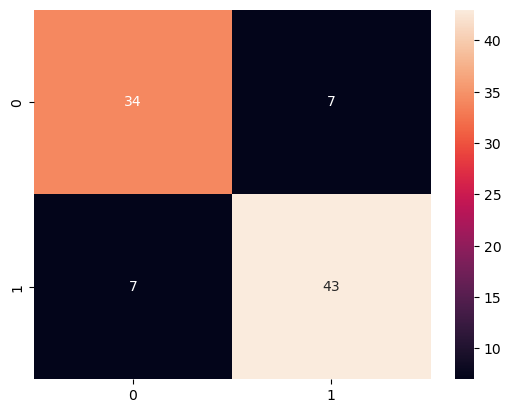

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.


In [27]:
rfc.feature_importances_

array([0.07717904, 0.03353956, 0.10331917, 0.07852104, 0.07566135,
       0.00935667, 0.02016641, 0.11258377, 0.08372459, 0.12142853,
       0.04027866, 0.13207132, 0.11216988])

In [28]:
rfc.feature_importances_

array([0.07717904, 0.03353956, 0.10331917, 0.07852104, 0.07566135,
       0.00935667, 0.02016641, 0.11258377, 0.08372459, 0.12142853,
       0.04027866, 0.13207132, 0.11216988])

In [29]:
imp = pd.Series(rfc.feature_importances_)
imp.index = rfc.feature_names_in_
imp = imp.sort_values(ascending=False)
imp

ca          0.132071
oldpeak     0.121429
thalach     0.112584
thal        0.112170
cp          0.103319
exang       0.083725
trestbps    0.078521
age         0.077179
chol        0.075661
slope       0.040279
sex         0.033540
restecg     0.020166
fbs         0.009357
dtype: float64

In [30]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'oldpeak', 'thalach', 'thal', 'cp']


<AxesSubplot:title={'center':'Feature Importances Plot'}>

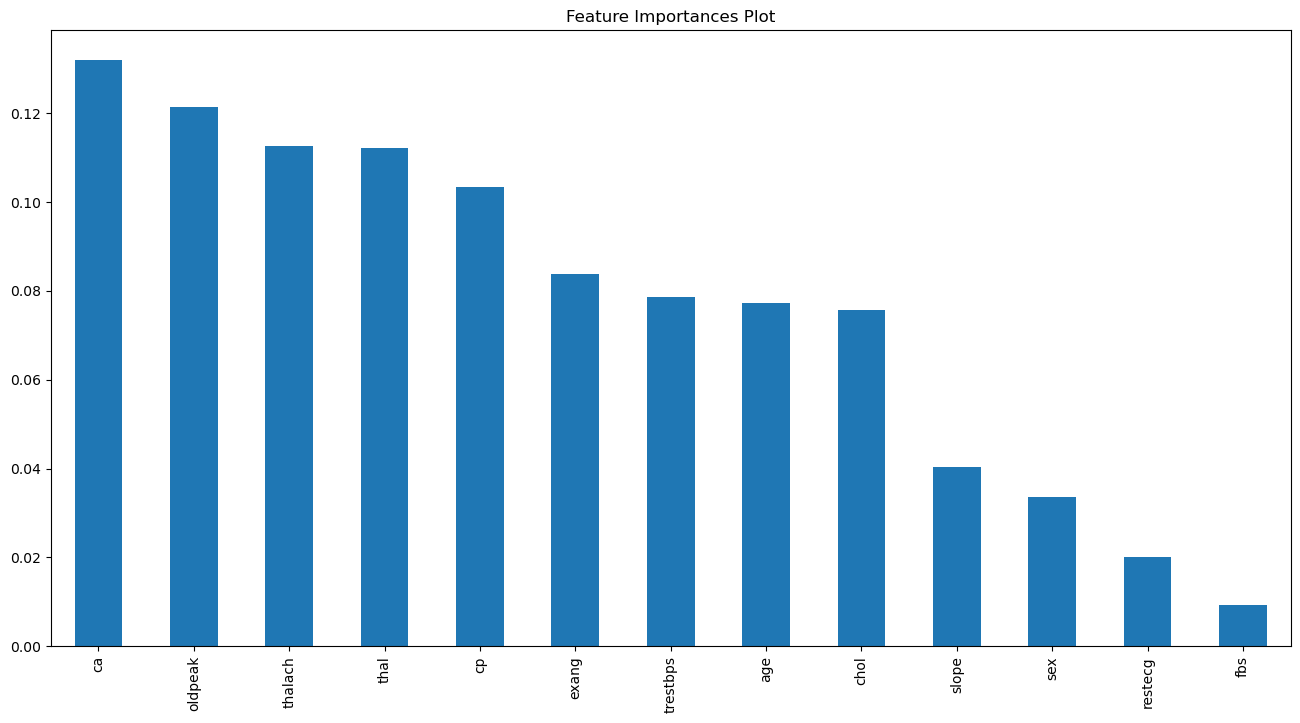

In [31]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


In [32]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [33]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [34]:
rscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.933 total time=   0.0s
[CV 2/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.783 total time=   0.0s
[CV 3/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.745 total time=   0.0s
[CV 4/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.936 total time=   0.0s
[CV 5/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.773 total time=   0.0s
[CV 1/5] END max_depth=8, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.844 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.875 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=6, min_samples_split=5, n_estimators=10;, score=0.708 total time=   0.0s
[CV 4

[CV 1/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.909 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.880 total time=   0.2s
[CV 3/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.784 total time=   0.3s
[CV 4/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.773 total time=   0.3s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.864 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.3s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.784 total time=   0.3s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_spl

[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.889 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.3s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.784 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.773 total time=   0.2s
[CV 1/5] END max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/5] END max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.760 total time=   0.1s
[CV 4/5] END max_depth=7, min_samples_leaf=2, min_samples_spl

[CV 1/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.913 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.3s
[CV 3/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.808 total time=   0.3s
[CV 4/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.744 total time=   0.2s
[CV 1/5] END max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.880 total time=   0.3s
[CV 3/5] END max_depth=8, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.784 total time=   0.3s
[CV 4/5] END max_depth=8, min_samples_leaf=5, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [36]:
rscv.best_score_

0.8608819285289873

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.


In [37]:
# Best Parameters
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 9}

In [38]:
# Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

In [39]:
# Best F1 Score
rscv.best_score_

0.8608819285289873

In [40]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(xtest,ytest.values.flatten(),rscv)


Results for Tuned Model :

Accuracy Score  : 0.8352
Precision Score : 0.8302
Recall Score    : 0.8800
F1 Score        : 0.8544


In [41]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [42]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.846154,0.835165
1,precision,0.860000,0.830189
2,recall,0.860000,0.880000
3,f1,0.860000,0.854369


All parameters of the tuned model increases all scores.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [43]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

In [44]:
imp_tuned = best_rfc.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_rfc.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.161898
cp          0.158788
thal        0.121230
exang       0.117358
oldpeak     0.108906
thalach     0.095726
slope       0.063871
age         0.053342
trestbps    0.034501
chol        0.034094
sex         0.032548
restecg     0.014255
fbs         0.003482
dtype: float64

In [45]:
imp_tuned[0:2]

ca    0.161898
cp    0.158788
dtype: float64

<AxesSubplot:title={'center':'Feature Importances for tuned model'}>

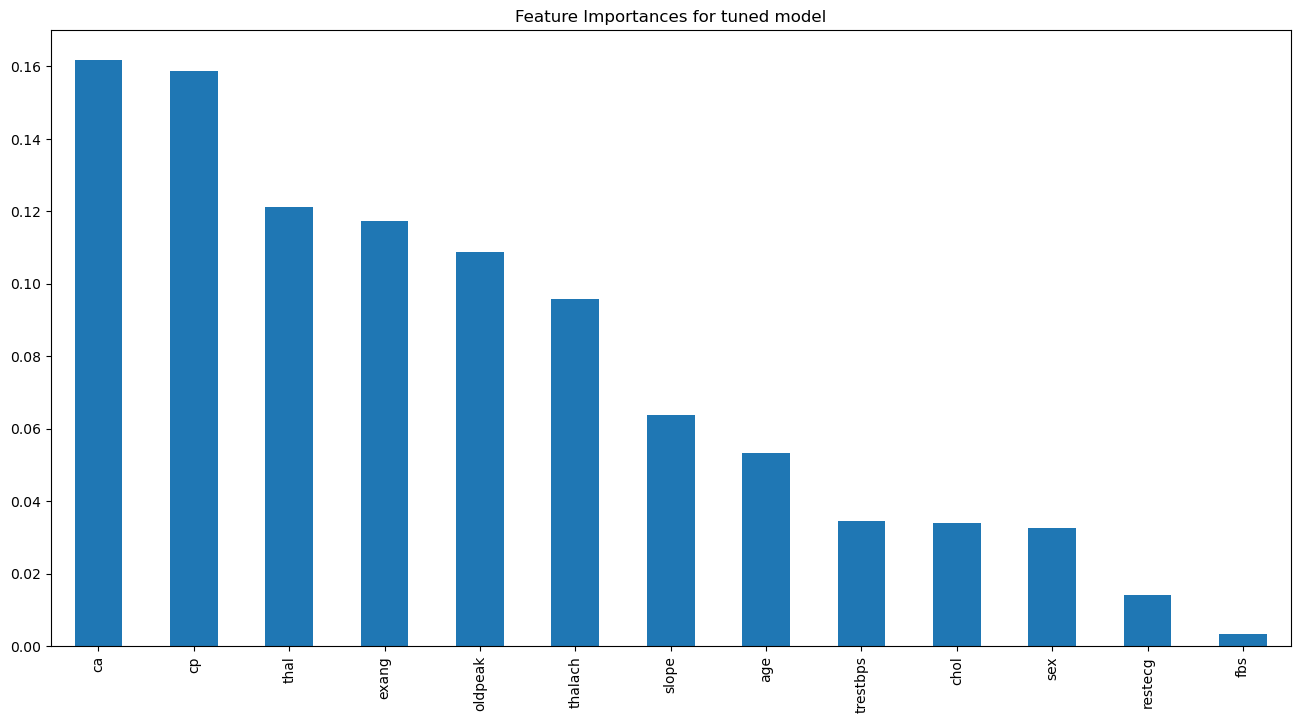

In [46]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))


In [47]:
top2 = xtrain[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [48]:
df_top2 =pd.concat([top2,ytrain],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


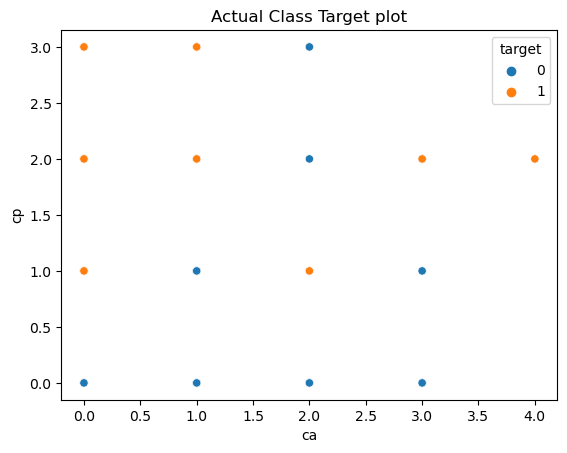

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [51]:
df_top2['predicted'] = best_rfc.predict(xtrain)

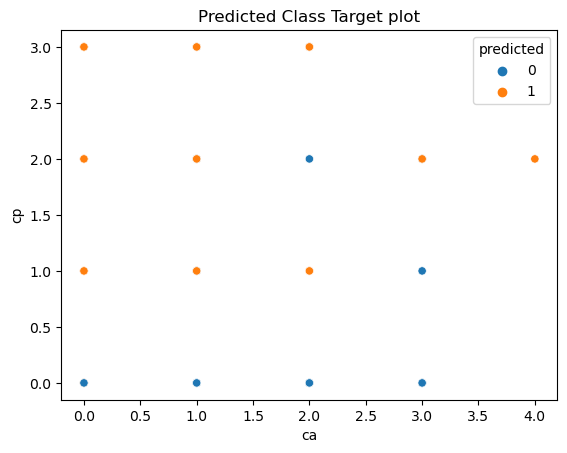

In [52]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()